# SToP Search String

In [515]:
import csv

#Loading Bar
from ipywidgets import IntProgress
from IPython.display import display
import time

#String Search library
import re

#write to xls format
from openpyxl.styles import Font
from openpyxl.utils import get_column_letter
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl import Workbook
from openpyxl import load_workbook

#Writing to Excel
wb = load_workbook(filename = "Stop_searchstring.xlsx")

In [725]:
f.close()

In [774]:
community_string = "Community1"

# open the file in the write mode
f = open('{}.csv'.format(community_string), 'w', newline='')
# create the csv writer
writer = csv.writer(f, delimiter=',')

ws = wb.create_sheet('{}'.format(community_string))

ws.cell(row = 1, column = 1).value = "Searchstring"
ws.cell(row = 1, column = 2).value = "Count"

row_number = 2

In [775]:
#CSV Extraction

data = []
with open(r'C:\Users\EPan\Documents\STOP\SToP Data\SToP Medications report_{}_2017-Present_deidentified.csv'.format(community_string)) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        data.append(row)

# 0 - ID
# 4 - Product Name
# 13 - Start Date
        
Med_Array = []
for a in range (0, len(data)):
                
    ID = data[a][0]
    Product_Name = data[a][4]
    Start_Date = data[a][13]
    
    Med_Array.append([ID, Product_Name, Start_Date])
    
data = []
with open(r'C:\Users\EPan\Documents\STOP\SToP Data\SToP Progressnote report_{}_2017-Present_deidentified.csv'.format(community_string)) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        data.append(row)

# 0 - ID
# 1 - Date
# 3 - Presenting Complaint
# 4 - Primary Presenting Complaint
# 5 - Other Complaints
# 6 - Diagnosis
        
Prog_Array = []
for a in range (0, len(data)):
                
    ID = data[a][0]
    Date = data[a][1]
    Presenting_complaint = data[a][3]
    Primary_presenting_complaint = data[a][4]
    Other_complaints = data[a][5]
    Diagnosis = data[a][6]
    
    Prog_Array.append([ID, Date, Presenting_complaint, Primary_presenting_complaint, Other_complaints, Diagnosis])

Med_Array contains some duplicates. Remove the duplicates for much less data combined data

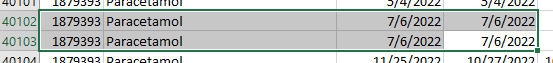

In [776]:
#Removing Duplicates
new_Med_Array = []

seen = set()
for item in Med_Array:
    t = tuple(item)
    if t not in seen:
        new_Med_Array.append(item)
        seen.add(t)
        
new_Prog_Array = []

seen = set()
for item in Prog_Array:
    t = tuple(item)
    if t not in seen:
        new_Prog_Array.append(item)
        seen.add(t)

In [777]:
#Finding all the unique Identifiers from Med_Array (Combination of ID + Date)
UID = []
for a in range (0, len(new_Med_Array)):
    ID = new_Med_Array[a][0]
    Start_Date = new_Med_Array[a][2]
    
    temp = [ID, Start_Date]
    if temp not in UID:
        UID.append(temp)
        
for a in range (0, len(new_Prog_Array)):
    ID = new_Prog_Array[a][0]
    Date = new_Prog_Array[a][1]
    
    temp = [ID, Date]
    if temp not in UID:
        UID.append(temp)

In [ ]:
# Merging the two data sets on ID + Date/Start_Date

f = IntProgress(min=1, max=len(UID)/100) # instantiate the bar
display(f) # display the bar

#Takes about 30 minutes...
Data_Array = []
for a in range(0, len(UID)):
    temp_row = []
    
    #Progress Bar
    if a % 100 == 0:
        f.value += 1 # signal to increment the progress bar
        
    ID = UID[a][0]
    Date = UID[a][1]
        
    #Loop Through new_Med_Array
    temp = []
    for b in range (0, len(new_Med_Array)):
        if ID == new_Med_Array[b][0] and Date == new_Med_Array[b][2]:
            temp.append(new_Med_Array[b])
    temp_row.append(temp)
    
    #Loop Through new_Prog_Array
    temp = []
    for b in range (0, len(new_Prog_Array)):
        if ID == new_Prog_Array[b][0] and Date == new_Prog_Array[b][1]:
            temp.append(new_Prog_Array[b])
    temp_row.append(temp)
    
    #Final Merged Dataset
    Data_Array.append(temp_row)

IntProgress(value=1, max=701, min=1)

In [731]:
#Count missing linkage parts

count_missing_prog = 0
count_missing_med = 0
for a in range (0, len(Data_Array)):
    if len(Data_Array[a][1]) == 0:
        count_missing_prog = count_missing_prog + 1
    if len(Data_Array[a][0]) == 0:
        count_missing_med = count_missing_med + 1
        
print(count_missing_prog, count_missing_med)

1444 52315


In [732]:
Data_Array[1]

[[['1146', 'Famciclovir', '7/8/2021']],
 [['1146', '7/8/2021', '', 'Recurrent cold sore', '', '']]]

In [733]:
# Search for the search terms

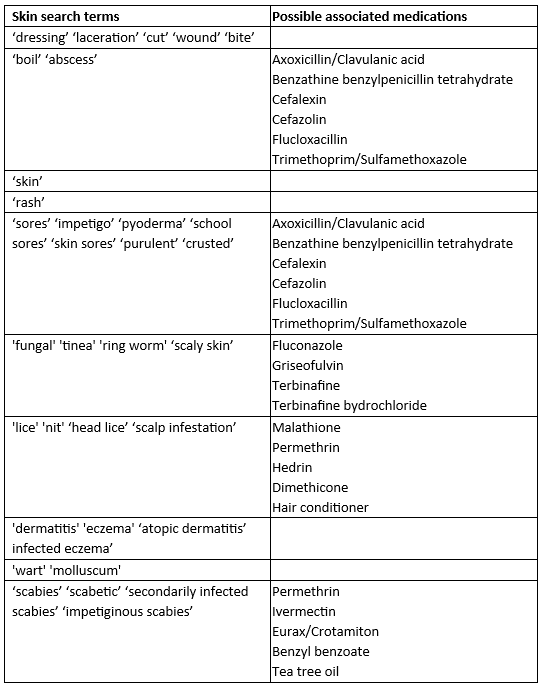

## Search 1 ["dressing", "laceration", "cut", "wound", "bite"]

In [734]:
import datetime
from datetime import datetime

In [735]:
search = ["dressing", "laceration", "cut", "wound", "bite"]
#Cut catches "acute", "subcutaneous", "electrocution"
med = []

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    if searchstring == "cut":
                        if not re.search("acute", temp_string) and not re.search("subcutaneous", temp_string) and not re.search("electrocution", temp_string):
                            #print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])
                    else:
                        #print(a, temp_date, b, temp_string)
                        temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
dressing
-----------------------
laceration
-----------------------
cut
-----------------------
wound
-----------------------
bite


In [736]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 168 dressing
1 213 laceration
2 54 cut
3 1639 wound
4 159 bite


In [737]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 2 ["boil", "abscess"]

In [738]:
search = ["boil", "abscess"]

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    #print(a, temp_id, temp_date, b, temp_string)
                    temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
boil
-----------------------
abscess


In [739]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 482 boil
1 186 abscess


In [740]:
#Connect the progress note results with the associated medications.
med = [["axoxicillian", "clavulanic"], ["benzathine", "benzylpenicillin", "tetrahydrate"], ["cefalexin"], ["cefazolin"], ["flucloxacillin"], ["trimethoprim", "sulfamethoxazole"]]

#Create a Medication Results array with the same dimensions as the search terms
med_array = []
for a in range (0, len(results_array)):
    med_results = [0 for a in range (0, len(med))]
    for b in range (0, len(results_array[a])):
        #Find the Data row that the result comes from
        data_row = results_array[a][b][0]
        temp_datarow = Data_Array[data_row][0] #The medication reports
        
        #Check to see if there are any medication reports linked to this progress note
        if len(temp_datarow) > 0:
            for c in range (0, len(temp_datarow)):
                med_string = temp_datarow[c][1].lower()
                
                #Iterate through the search terms
                for d in range (0, len(med)):
                    
                    flag = False #Flag to determine if subsets of the medical terms is present
                    for e in range (0, len(med[d])):
                        medSearchString = med[d][e]
                        if re.search(medSearchString, med_string):
                            #print(medSearchString, "--------", med_string)
                            flag = True
                    if flag:
                        med_results[d] = med_results[d] + 1
    med_array.append(med_results)

In [741]:
med_array

[[0, 31, 6, 12, 4, 100], [4, 11, 4, 16, 1, 23]]

In [742]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 3 ["skin", "rash"]

In [743]:
search = ["skin", "rash"]
med = []

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
skin
-----------------------
rash


In [744]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 886 skin
1 175 rash


In [745]:
for a in range (0, len(results_array)):
    #print(search[a])
    #print("----------------------------")
    for b in range (0, len(results_array[a])):
        #print(results_array[a][b][4])
        True

In [746]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 4 ["sores", "impetigo", "pyoderma", "school sores", "skin sores", "purulent", "crusted"]

In [747]:
search = ["sores", "impetigo", "pyoderma", "school sores", "skin sores", "purulent", "crusted"]

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    #print(a, temp_date, b, temp_string)
                    temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
sores
-----------------------
impetigo
-----------------------
pyoderma
-----------------------
school sores
-----------------------
skin sores
-----------------------
purulent
-----------------------
crusted


In [748]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 164 sores
1 328 impetigo
2 0 pyoderma
3 1 school sores
4 91 skin sores
5 8 purulent
6 1 crusted


In [749]:
#Connect the progress note results with the associated medications.
med = [["axoxicillian", "clavulanic"], ["benzathine", "benzylpenicillin", "tetrahydrate"], ["cefalexin"], ["cefazolin"], ["flucloxacillin"], ["trimethoprim", "sulfamethoxazole"]]

#Create a Medication Results array with the same dimensions as the search terms
med_array = []
for a in range (0, len(results_array)):
    med_results = [0 for a in range (0, len(med))]
    for b in range (0, len(results_array[a])):
        #Find the Data row that the result comes from
        data_row = results_array[a][b][0]
        temp_datarow = Data_Array[data_row][0] #The medication reports
        
        #Check to see if there are any medication reports linked to this progress note
        if len(temp_datarow) > 0:
            for c in range (0, len(temp_datarow)):
                med_string = temp_datarow[c][1].lower()
                
                #Iterate through the search terms
                for d in range (0, len(med)):
                    
                    flag = False #Flag to determine if subsets of the medical terms is present
                    for e in range (0, len(med[d])):
                        medSearchString = med[d][e]
                        if re.search(medSearchString, med_string):
                            #print(medSearchString, "--------", med_string)
                            flag = True
                    if flag:
                        med_results[d] = med_results[d] + 1
    med_array.append(med_results)

In [750]:
med_array

[[0, 52, 1, 1, 1, 21],
 [1, 86, 2, 1, 0, 80],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 29, 0, 0, 1, 13],
 [1, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0]]

In [751]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 5 ["fungal", "tinea", "ring worm", "scaly skin"]

In [752]:
search = ["fungal", "tinea", "ring worm", "scaly skin"]

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    temp.append([a, temp_id, temp_date, b, temp_string])
                    
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
fungal
-----------------------
tinea
-----------------------
ring worm
-----------------------
scaly skin


In [753]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 40 fungal
1 90 tinea
2 3 ring worm
3 0 scaly skin


In [754]:
#Connect the progress note results with the associated medications.
med = [["fluconazole"], ["griseofulvin"], ["terbinafine"], ["terbinafine", "bydrochloride"]]

#Create a Medication Results array with the same dimensions as the search terms
med_array = []
for a in range (0, len(results_array)):
    med_results = [0 for a in range (0, len(med))]
    for b in range (0, len(results_array[a])):
        #Find the Data row that the result comes from
        data_row = results_array[a][b][0]
        temp_datarow = Data_Array[data_row][0] #The medication reports
        
        #Check to see if there are any medication reports linked to this progress note
        if len(temp_datarow) > 0:
            for c in range (0, len(temp_datarow)):
                med_string = temp_datarow[c][1].lower()
                
                #Iterate through the search terms
                for d in range (0, len(med)):
                    
                    flag = False #Flag to determine if subsets of the medical terms is present
                    for e in range (0, len(med[d])):
                        medSearchString = med[d][e]
                        if re.search(medSearchString, med_string):
                            #print(medSearchString, "--------", med_string)
                            flag = True
                    if flag:
                        med_results[d] = med_results[d] + 1
    med_array.append(med_results)

In [755]:
med_array

[[0, 0, 5, 5], [1, 0, 24, 24], [0, 0, 2, 2], [0, 0, 0, 0]]

In [756]:
# #Print Medications
# for a in range (0, len(results_array)):
#     print(search[a])
#     print("----------------------------")
#     for b in range (0, len(results_array[a])):
#         print(Data_Array[results_array[a][b][0]][0])

In [757]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 6 ["lice", "nit", "head lice", "scalp infestation"]

In [758]:
search = ["lice", "head lice", "scalp infestation"]
#lice - police, license
#nit - community, cognitive... Too many words contain nit

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    if searchstring == "lice":
                        if not re.search("police", temp_string) and not re.search("license", temp_string):
                            #print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])
                    elif searchstring == "nit":
                        if not re.search("community", temp_string) and not re.search("cognitive", temp_string):
                            print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])                        
                    else:
                        #print(a, temp_date, b, temp_string)
                        temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
lice
-----------------------
head lice
-----------------------
scalp infestation


In [759]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 98 lice
1 54 head lice
2 0 scalp infestation


In [760]:
#Connect the progress note results with the associated medications.
med = [["malathione"], ["permethrin"], ["hedrin"], ["dimethicone"], ["hair", "conditioner"]]

#Create a Medication Results array with the same dimensions as the search terms
med_array = []
for a in range (0, len(results_array)):
    med_results = [0 for a in range (0, len(med))]
    for b in range (0, len(results_array[a])):
        #Find the Data row that the result comes from
        data_row = results_array[a][b][0]
        temp_datarow = Data_Array[data_row][0] #The medication reports
        
        #Check to see if there are any medication reports linked to this progress note
        if len(temp_datarow) > 0:
            for c in range (0, len(temp_datarow)):
                med_string = temp_datarow[c][1].lower()
                
                #Iterate through the search terms
                for d in range (0, len(med)):
                    
                    flag = False #Flag to determine if subsets of the medical terms is present
                    for e in range (0, len(med[d])):
                        medSearchString = med[d][e]
                        if re.search(medSearchString, med_string):
                            #print(medSearchString, "--------", med_string)
                            flag = True
                    if flag:
                        med_results[d] = med_results[d] + 1
    med_array.append(med_results)

In [761]:
med_array

[[0, 0, 10, 0, 0], [0, 0, 7, 0, 0], [0, 0, 0, 0, 0]]

In [762]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 7 ["dematitis", "eczema", "atopic dermatitis", "infected eczema"]

In [763]:
search = ["dermatitis", "eczema", "atopic dermatitis", "infected eczema"]
med = []

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    if searchstring == "lice":
                        if not re.search("police", temp_string) and not re.search("license", temp_string):
                            #print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])
                    elif searchstring == "nit":
                        if not re.search("community", temp_string) and not re.search("cognitive", temp_string):
                            print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])                        
                    else:
                        #print(a, temp_date, b, temp_string)
                        temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
dermatitis
-----------------------
eczema
-----------------------
atopic dermatitis
-----------------------
infected eczema


In [764]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 27 dermatitis
1 7 eczema
2 0 atopic dermatitis
3 1 infected eczema


In [765]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 8 ["wart", "molluscum"]

In [766]:
search = ["wart", "mulluscum"]
med = []

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    if searchstring == "lice":
                        if not re.search("police", temp_string) and not re.search("license", temp_string):
                            #print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])
                    elif searchstring == "nit":
                        if not re.search("community", temp_string) and not re.search("cognitive", temp_string):
                            print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])                        
                    else:
                        #print(a, temp_date, b, temp_string)
                        temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
wart
-----------------------
mulluscum


In [767]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 24 wart
1 0 mulluscum


In [768]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")

## Search 9 ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

In [769]:
search = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

results_array = []
for searchstring in search: 
    print("-----------------------")
    print(searchstring)
    temp = []
    for a in range (0, len(Data_Array)):
        if len(Data_Array[a]) != 0:
            for b in range (0, len(Data_Array[a][1])):
                temp_string = Data_Array[a][1][b][2] + " " + Data_Array[a][1][b][3] +  " " +  Data_Array[a][1][b][4] + " " +  Data_Array[a][1][b][5]
                temp_string = temp_string.lower()
                temp_id = Data_Array[a][1][b][0]

                #Convert to datetime.date() so it can be used to compare for consecutive windows
                temp_date = Data_Array[a][1][b][1]
                if temp_date != 'Day of Progress Note Date':
                    temp_date = datetime.strptime(temp_date, "%m/%d/%Y").date()

                if re.search(searchstring, temp_string):
                    if searchstring == "lice":
                        if not re.search("police", temp_string) and not re.search("license", temp_string):
                            #print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])
                    elif searchstring == "nit":
                        if not re.search("community", temp_string) and not re.search("cognitive", temp_string):
                            print(a, temp_id, temp_date, b, temp_string)
                            temp.append([a, temp_id, temp_date, b, temp_string])                        
                    else:
                        #print(a, temp_date, b, temp_string)
                        temp.append([a, temp_id, temp_date, b, temp_string])
    results_array.append(temp)
    
#Sort by patient ID so that we can remove consecutive clinic visits (within 3 days)
for a in range (0, len(results_array)):
    results_array[a] = sorted(results_array[a], key=lambda l: (int(l[1]), l[2]))
    
#Iterate through the results_array to check to see if anyone is within the same time window
for a in range (0, len(results_array)):
    delete_array = []
    for b in range (1, len(results_array[a])):
        #If the ID is the same
        if results_array[a][b][1] == results_array[a][b-1][1]:
            #Check date
            date1 = results_array[a][b-1][2]
            date2 = results_array[a][b][2]

            #If it is less than 4 days
            if (date2 - date1).days < 4:
                #print(b, date1, date2)
                delete_array.append(b)

    #print(delete_array)
    #Reverse Order of the delete array
    delete_array.sort(reverse=True)

    #Delete those rows in the array
    for b in range (0, len(delete_array)):
        del results_array[a][delete_array[b]]

-----------------------
scabies
-----------------------
scabetic
-----------------------
secondarily infected scabies
-----------------------
impetiginous scabies


In [770]:
for a in range (0, len(results_array)):
    print(a, len(results_array[a]), search[a])

0 208 scabies
1 0 scabetic
2 0 secondarily infected scabies
3 0 impetiginous scabies


In [771]:
#Connect the progress note results with the associated medications.
med = [["permethrin"], ["ivermectin"], ["eurax", "crotamiton"], ["benzyl", "benzoate"], ["tea", "tree", "oil"]]

#Create a Medication Results array with the same dimensions as the search terms
med_array = []
for a in range (0, len(results_array)):
    med_results = [0 for a in range (0, len(med))]
    for b in range (0, len(results_array[a])):
        #Find the Data row that the result comes from
        data_row = results_array[a][b][0]
        temp_datarow = Data_Array[data_row][0] #The medication reports
        
        #Check to see if there are any medication reports linked to this progress note
        if len(temp_datarow) > 0:
            for c in range (0, len(temp_datarow)):
                med_string = temp_datarow[c][1].lower()
                
                #Iterate through the search terms
                for d in range (0, len(med)):
                    
                    flag = False #Flag to determine if subsets of the medical terms is present
                    for e in range (0, len(med[d])):
                        medSearchString = med[d][e]
                        if re.search(medSearchString, med_string):
                            #print(medSearchString, "--------", med_string)
                            flag = True
                    if flag:
                        med_results[d] = med_results[d] + 1
    med_array.append(med_results)

In [772]:
med_array

[[47, 13, 2, 18, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

In [773]:
#Write to xlsx sheet
for a in range (0, len(results_array)):
    ws.cell(row = row_number, column = 1).value = search[a]
    ws.cell(row = row_number, column = 2).value = len(results_array[a])
    
    #Write the medications associated with each search term
    if len(med) > 0:
        for b in range (0, len(med)):
            temp_string = ""
            for i in med[b]:
                temp_string += i
            ws.cell(row = row_number, column = 4 + b).value = temp_string
            ws.cell(row = row_number + 1, column = 4 + b).value = med_array[a][b]
            
    row_number = row_number + 2
            
#Write the results to csv for mark
for a in range (0, len(results_array)):
    for b in range (0, len(results_array[a])):
        excel_write = [search[a], results_array[a][b][1], results_array[a][b][2], results_array[a][b][4]]
        writer.writerow(excel_write)

wb.save("Stop_searchstring.xlsx")